In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from dcgan import Generator
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image

In [2]:
generator = Generator(latent_dim=100,out_chan=3)
generator.load_state_dict(torch.load('face_generator2.pt'))

<All keys matched successfully>

In [9]:
noise1 = torch.randn(1, 100, 1, 1)

In [4]:
noise2 = torch.randn(1, 100, 1, 1)

In [10]:
fake1 = generator(noise1)

In [ ]:
fake2 = generator(noise2)


In [12]:
save_image(fake1,'image_test/1.png', normalize=True)

In [ ]:
save_image(fake2,'image_test/2.png', normalize=True)

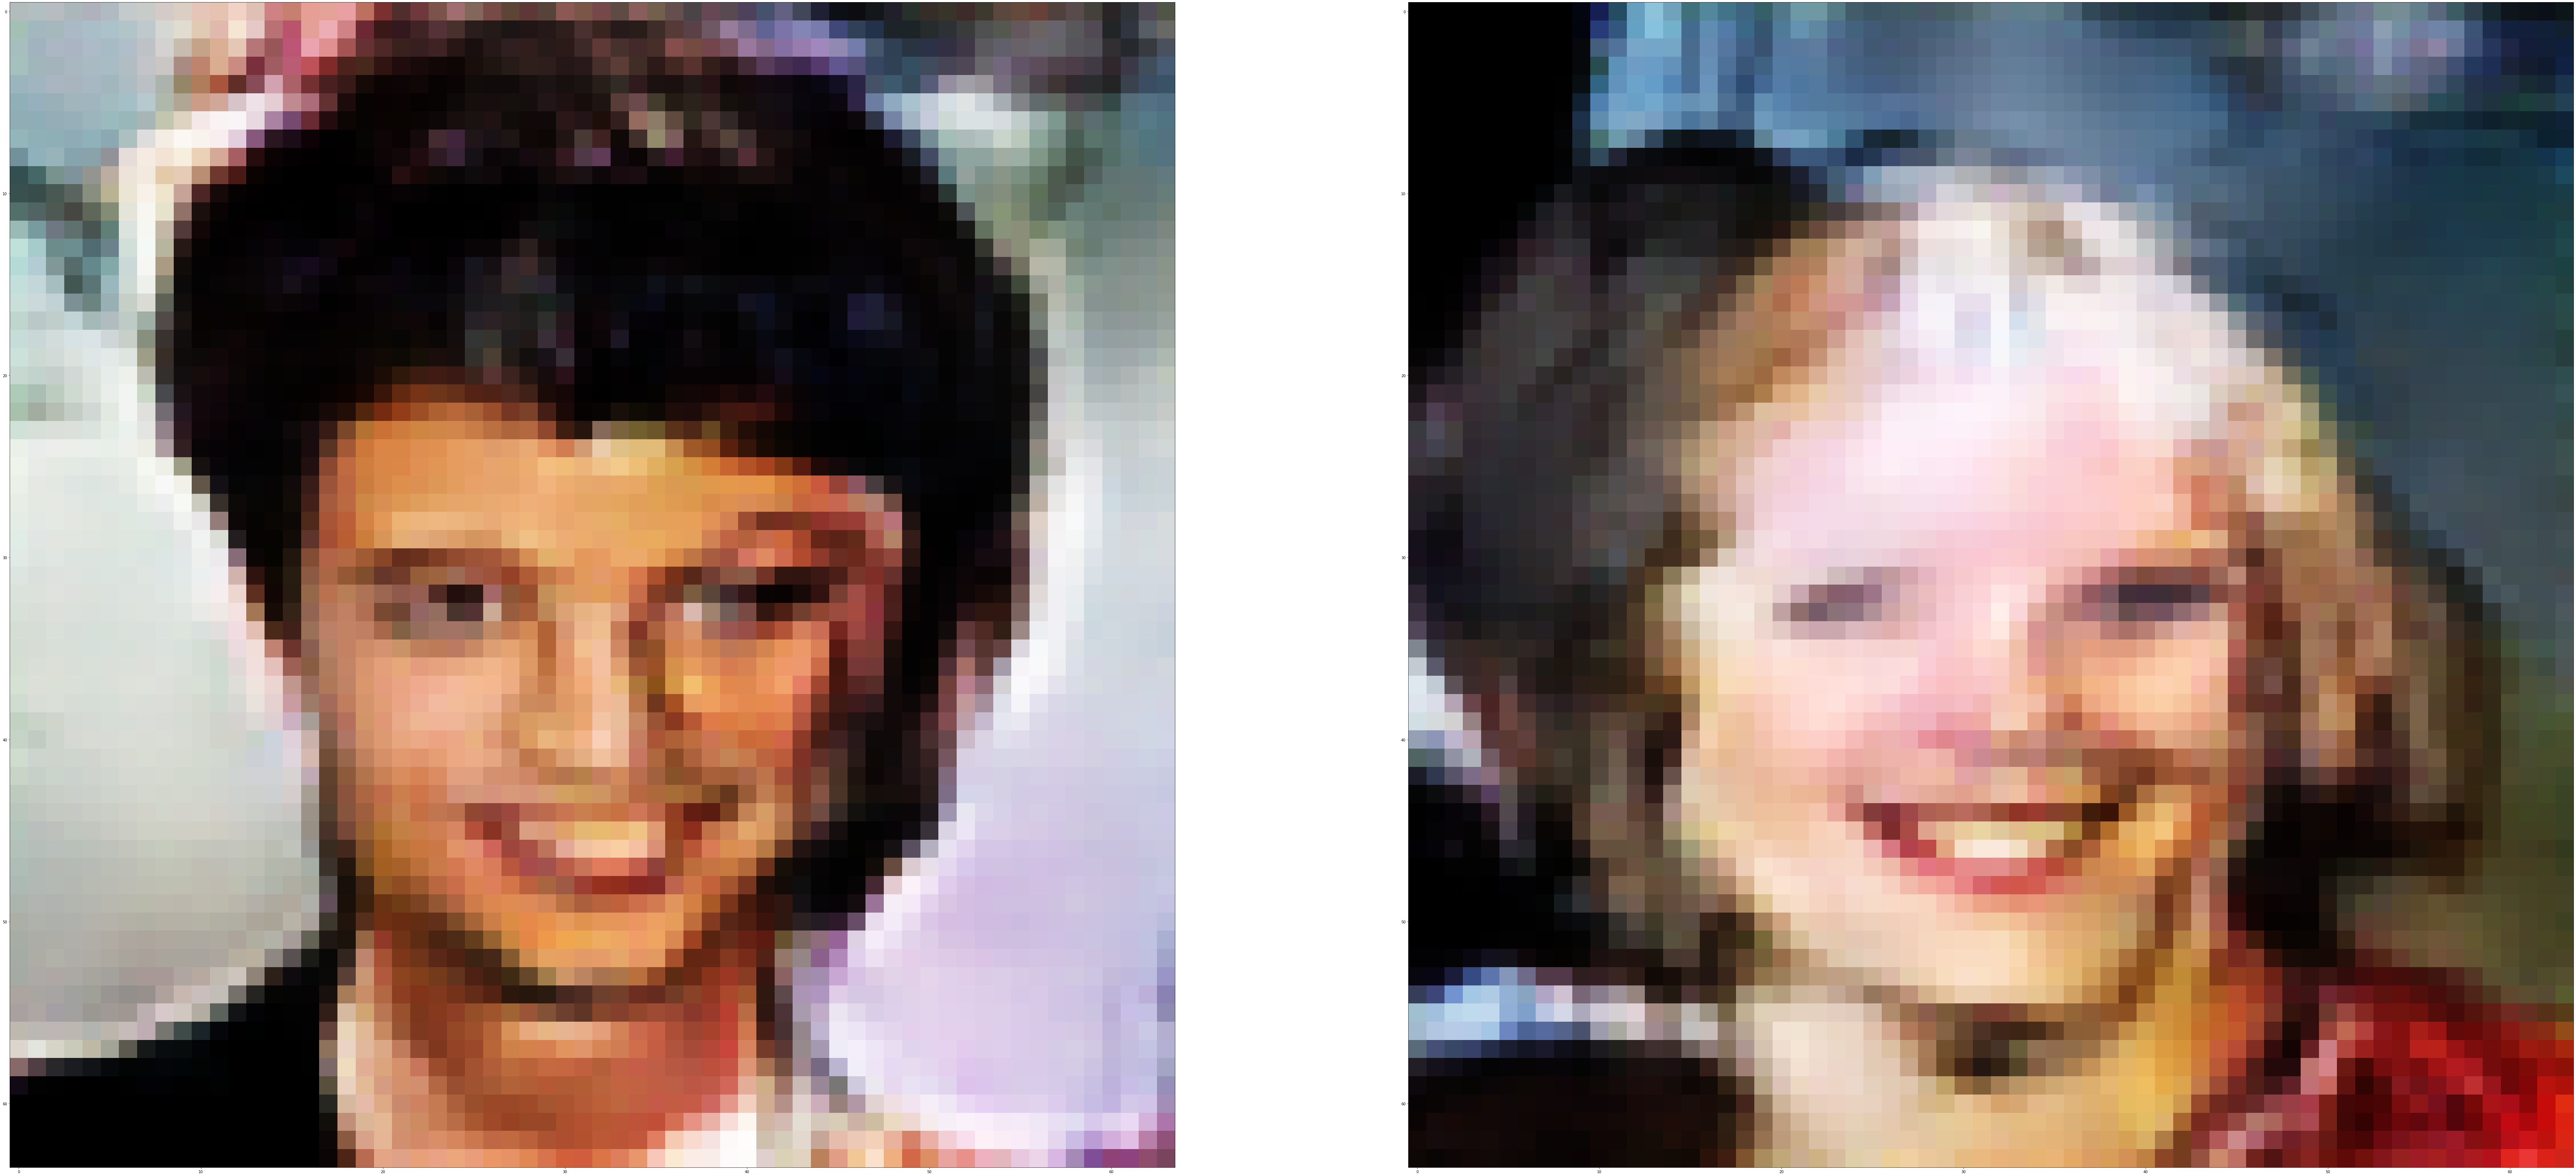

In [13]:
fig_fake,axis_fake = plt.subplots(1,2,figsize=(128,64))
img1 = Image.open('image_test/1.png')
img2 = Image.open('image_test/2.png')
axis_fake[0].imshow(img1)
axis_fake[1].imshow(img2)
plt.show()

In [14]:
torch.save(noise1,'boy1.pt')
torch.save(noise2,'girl1.pt')

### Interpolation

In [15]:
boy1 = torch.load('boy1.pt')
girl1 = torch.load('girl1.pt')
noise_lst = []
num = 9
for i in range(num):
    noise = (i * boy1 + (num-i) * girl1)/num
    noise_lst.append(noise)

In [21]:
img_lst=[]
for i in range(num):
    img = generator(noise_lst[i]).squeeze()
    img_lst.append(img)
save_image(img_lst,'images/boy2girl.png',nrow=9,normalize=True)

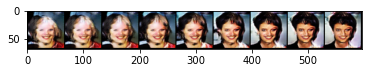

In [22]:
boy2girl = Image.open('images/boy2girl.png')
plt.imshow(boy2girl)
plt.show()
